# 知识阶段性总结（知识考查）

* 本周主要内容：高德API
* 20春_API_人工智能与机器学习_week05
*  电子讲义设计者：许智超，廖汉腾
<br/>
<br/>

## 上周回顾：
1. 地图API简介（Web服务）
2. 如何选择合适的API（开发支持）
3. 权衡经济成本和产品设计成本（调用量和并发量思考，经济成本考量）
4. 设计地图url需求
5. 测试API功能
    1. 地理编码/逆地理编码
    2. 路径规划





----


<br/>
<br/>

# 细读地图API（高德）



## 本周内容介绍

* 关键：如何详细阅读和使用API参数
    1. 回顾地理编码、逆地理编码、步行路径规划
    2. 路径规划2
    3. 搜索POI
    4. IP定位
    5. 批量请求借口
    6. 静态地图
    7. 坐标转换 
    8. 交通态势



In [2]:
%%html
<style>
/* 本电子讲义使用之CSS */
div.code_cell {
    background-color: #e5f1fe;
}
div.cell.selected {
    background-color: #effee2;
    font-size: 2rem;
    line-height: 2.4rem;
}
div.cell.selected .rendered_html table {
    font-size: 2rem !important;
    line-height: 2.4rem !important;
}
.rendered_html pre code {
    background-color: #C4E4ff;   
    padding: 2px 25px;
}
.rendered_html pre {
    background-color: #99c9ff;
}
div.code_cell .CodeMirror {
    font-size: 2rem !important;
    line-height: 2.4rem !important;
}
.rendered_html img, .rendered_html svg {
    max-width: 100%;
    height: auto;
    float: center;
}
/* Gradient transparent - color - transparent */
hr {
    border: 0;
    border-bottom: 1px dashed #ccc;
}
.emoticon{
    font-size: 5rem;
    line-height: 4.4rem;
    text-align: center;
    vertical-align: middle;
}

</style>

## 回顾地理编码、逆地理编码、步行路径规划（代码A）

In [1]:
import pandas as pd

In [2]:
import requests
key_xu ="1a8b4a8f8eacf6e72af8287289e0e270"

### A-1 获取地理编码

In [3]:
# A-1 地理编码
def geocode(address,city=None,batch=None,sig=None)->dict:
    """获取地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/geo?parameters'
    params={
        'key': key_xu,
        'address':address,
        'city':city,
        'batch':batch,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
中大南方 = geocode(address='广东省广州市从化区中山大学南方学院')
print(中大南方)
df_中大南方地理编码 = pd.json_normalize(中大南方['geocodes'])
display(df_中大南方地理编码)
中大南方地理编码 = 中大南方['geocodes'][0]['location']
print("中大南方地理编码:",中大南方地理编码)

{'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '1', 'geocodes': [{'formatted_address': '广东省广州市从化区中山大学南方学院', 'country': '中国', 'province': '广东省', 'citycode': '020', 'city': '广州市', 'district': '从化区', 'township': [], 'neighborhood': {'name': [], 'type': []}, 'building': {'name': [], 'type': []}, 'adcode': '440117', 'street': [], 'number': [], 'location': '113.679287,23.632575', 'level': '兴趣点'}]}


,formatted_address,country,province,citycode,city,district,township,adcode,street,number,location,level,neighborhood.name,neighborhood.type,building.name,building.type
0,广东省广州市从化区中山大学南方学院,中国,广东省,020,广州市,从化区,[],440117,[],[],"113.679287,23.632575",兴趣点,[],[],[],[]


中大南方地理编码: 113.679287,23.632575


### A-2 逆地理编码（基础/全）

In [28]:
# A-2 基础逆地理编码分析
def regeocode(location,poitype=None,radius=None,extensions="base",batch=False,roadlevel=None,sig=None,homeorcorp=None)->dict:
    """获取逆地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/regeo?parameters'
    params={
        'key': key_xu,
        'location':location,
        'poitype':poitype,
        'radius':radius,
        'extensions':extensi
        'roadlevel':roadleveons,
        'batch':batch,l,
        'homeorcorp':homeorcorp,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

中大南方逆地理编码_base = regeocode(中大南方地理编码)
print(中大南方逆地理编码)
df_中大南方逆地理编码 = pd.json_normalize(中大南方逆地理编码).T
display(df_中大南方逆地理编码)

{'status': '1', 'regeocode': {'addressComponent': {'city': '广州市', 'province': '广东省', 'adcode': '440117', 'district': '从化区', 'towncode': '440117103000', 'streetNumber': {'number': '7号', 'location': '113.6786,23.6333289', 'direction': '西北', 'distance': '109.203', 'street': '博学路'}, 'country': '中国', 'township': '温泉镇', 'businessAreas': [[]], 'building': {'name': [], 'type': []}, 'neighborhood': {'name': [], 'type': []}, 'citycode': '020'}, 'formatted_address': '广东省广州市从化区温泉镇中山大学南方学院'}, 'info': 'OK', 'infocode': '10000'}


,0
status,1
info,OK
infocode,10000
regeocode.addressComponent.city,广州市
regeocode.addressComponent.province,广东省
regeocode.addressComponent.adcode,440117
regeocode.addressComponent.district,从化区
regeocode.addressComponent.towncode,440117103000
regeocode.addressComponent.streetNumber.number,7号
regeocode.addressComponent.streetNumber.location,"113.6786,23.6333289"


In [33]:
# A-2 Extra 全部逆地理编码分析
中大南方逆地理编码_all = regeocode(中大南方地理编码,extensions="all")
print(中大南方逆地理编码_all)
df_中大南方逆地理编码_all = pd.json_normalize(中大南方逆地理编码_all)
display(df_中大南方逆地理编码_all)

{'status': '1', 'regeocode': {'roads': [{'id': '020F49F0050461203', 'location': '113.68,23.634', 'direction': '南', 'name': '博学路', 'distance': '156.951'}, {'id': '020F49F0050462451', 'location': '113.677,23.6347', 'direction': '东南', 'name': '中山路', 'distance': '343.951'}, {'id': '020F49F006047765', 'location': '113.682,23.6394', 'direction': '南', 'name': 'S29从莞深高速', 'distance': '807.947'}], 'roadinters': [{'second_name': '中山路', 'first_id': '020F49F0050461203', 'second_id': '020F49F0050462451', 'location': '113.6767944,23.63466139', 'distance': '343.951', 'first_name': '博学路', 'direction': '东南'}], 'formatted_address': '广东省广州市从化区温泉镇中山大学南方学院', 'addressComponent': {'city': '广州市', 'province': '广东省', 'adcode': '440117', 'district': '从化区', 'towncode': '440117103000', 'streetNumber': {'number': '7号', 'location': '113.6786,23.6333289', 'direction': '西北', 'distance': '109.203', 'street': '博学路'}, 'country': '中国', 'township': '温泉镇', 'businessAreas': [[]], 'building': {'name': [], 'type': []}, 'neighb

,status,info,infocode,regeocode.roads,regeocode.roadinters,regeocode.formatted_address,regeocode.addressComponent.city,regeocode.addressComponent.province,regeocode.addressComponent.adcode,regeocode.addressComponent.district,...,regeocode.addressComponent.country,regeocode.addressComponent.township,regeocode.addressComponent.businessAreas,regeocode.addressComponent.building.name,regeocode.addressComponent.building.type,regeocode.addressComponent.neighborhood.name,regeocode.addressComponent.neighborhood.type,regeocode.addressComponent.citycode,regeocode.aois,regeocode.pois
0,1,OK,10000,"[{'id': '020F49F0050461203', 'location': '113....","[{'second_name': '中山路', 'first_id': '020F49F00...",广东省广州市从化区温泉镇中山大学南方学院,广州市,广东省,440117,从化区,...,中国,温泉镇,[[]],[],[],[],[],020,"[{'area': '536585.849985', 'type': '141201', '...","[{'id': 'B00140MR9A', 'direction': '西', 'busin..."


### A-3 全部逆地理编码分析细节

1. 大家先思考一个问题，你给高德的地址和他给你的，是不是它大气的多？
2. 这些细节哪些是有用的？假设用户给你一个地址，和一定的诉求，我们是不是可以推荐一些POI地址？

![](http://static.leiphone.com/uploads/new/article/740_740/201612/5860bb12da0e0.png?imageMogr2/format/jpg/quality/90)

In [40]:
# A-3 分析细节
roads = pd.json_normalize(中大南方逆地理编码_all['regeocode']['roads'])
roadinters = pd.json_normalize(中大南方逆地理编码_all['regeocode']['roadinters'])
aois = pd.json_normalize(中大南方逆地理编码_all['regeocode']['aois'])
pois = pd.json_normalize(中大南方逆地理编码_all['regeocode']['pois'])
display(roads,roadinters,aois,pois)


,id,location,direction,name,distance
0,020F49F0050461203,"113.68,23.634",南,博学路,156.951
1,020F49F0050462451,"113.677,23.6347",东南,中山路,343.951
2,020F49F006047765,"113.682,23.6394",南,S29从莞深高速,807.947


,second_name,first_id,second_id,location,distance,first_name,direction
0,中山路,020F49F0050461203,020F49F0050462451,"113.6767944,23.63466139",343.951,博学路,东南


,area,type,id,location,adcode,name,distance
0,536585.849985,141201,B00140MR9A,"113.679262,23.632583",440117,中山大学南方学院,0


,id,direction,businessarea,address,poiweight,name,location,distance,tel,type
0,B00140MR9A,西,[],温泉大道882号,0.450402,中山大学南方学院,"113.679262,23.632583",2.69979,020-61787326;020-61787333,科教文化服务;学校;高等院校
1,B0FFF2VMJ4,东南,[],温泉大道886号中山大学南方学院内,0.148531,中山大学南方学院-综合楼,"113.680117,23.631544",142.466,[],科教文化服务;学校;学校
2,B0FFFTC9PH,东北,[],博学路附近,0.193172,中山大学南方学院教学楼10号,"113.680125,23.633492",132.988,[],科教文化服务;科教文化场所;科教文化场所
3,B00141TQKX,西北,[],温泉大道882,0.148531,中山大学南方学院教学楼6号,"113.678424,23.633710",153.818,[],科教文化服务;学校;学校
4,B00141WQCO,东北,[],博学路附近,0.14954,中山大学南方学院教学楼8号,"113.680399,23.634329",225.543,[],科教文化服务;科教文化场所;科教文化场所
5,B00141TRVH,西南,[],博学路21,0.148531,中山大学南方学院教学楼2号,"113.677060,23.631346",264.846,[],科教文化服务;科教文化场所;科教文化场所
6,B0FFKP9ET5,西南,[],博学路附近,0.191742,中山大学南方学院1号实验楼,"113.678215,23.631370",172.86,[],科教文化服务;科教文化场所;科教文化场所
7,B00140TWHT,南,[],笃行路2,0.157653,教工住宅1号,"113.678490,23.630432",251.758,[],商务住宅;住宅区;住宅小区
8,B0FFHC4XU0,南,[],温泉大道886号,0.158426,中山大学南方学院学术交流中心,"113.679959,23.630496",241.095,[],科教文化服务;科教文化场所;科教文化场所
9,B0FFLBEOND,东南,[],[],0.190963,聚贤楼10号,"113.681253,23.631036",263.444,[],商务住宅;住宅区;宿舍


### 学生练习：
1. 观察和练习其他参数
2. 想得到更大范围的搜索POI如何操作
3. * 请pandas学过的同学对address进行分组groupby练习，尝试找寻不同根类地址下的type（可选用你所找寻的地址，不一定用中大南方）
4. * 请思考如何对不同类型的服务进行分类？如美食、旅馆、加油站...等
![](lianxi01.png)

## 路径规划（点到点的过程）  


### 产品的设计思维 

1. 请思考，什么样的产品需要路径规划？
2. 如果你的产品需要，你会如何使用？
3. 最优路线如何选择？高德会用到什么算法？（推荐系统）
    1. 推荐系统输入location么？（起点、终点？还是全部点？）
    2. 实时的定位？（多长时间定位一次）更新1
    3. 定位完成其他点的变化？距离的选择（用户希望路边有更多的需求还是希望快速找到目的地？）
    4. 以上思考的越多，你的产品考虑的会越周全，避免产品后期的大量更改。
    
4. 可能了解的知识面，不需要清楚怎么做，但可以了解输入输出的结果是什么。参考如下图

![](http://imgtec.eetrend.com/files/2019-03/%E5%8D%9A%E5%AE%A2/100018447-63696-10.jpg)

-----
![](https://pic2.zhimg.com/50/v2-45a26a9985308d90405dea78e6892dd0_r.jpg)

### 步行路径规划（API基本流程）（代码B）

#### B-1 准备base url、params、response.json（） 

In [41]:
# B-1 准备base url、params、response.json（） 
def walking(origin,destination,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/walking?parameters'
    params={
        'key':key_xu,
        'origin':origin,
        'destination':destination,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

#### B-2 准备walking 参数

请同学们尝试从A-3细节中获取的某两个教学楼的location，尝试步行路径规划（起点）🙅----->（终点）🙅‍

In [43]:
# B-2 准备walking 参数
龙岗社区居委会 = geocode('广东省广州市从化区龙岗社区居委会')
龙岗社区居委会_location = 龙岗社区居委会['geocodes'][0]['location']
中大南方_location = 中大南方['geocodes'][0]['location']
print("(起点)中大南方_location:",中大南方_location,"(终点)龙岗社区居委会_location:",龙岗社区居委会_location)

(起点)中大南方_location: 113.679287,23.632575 (终点)龙岗社区居委会_location: 113.669129,23.600956


#### B-3 实现步行路径规划

In [48]:
# B-3 路径规划
中大南方_龙岗社区居委会 = walking(中大南方_location,龙岗社区居委会_location)
df_步行路径规划 = pd.json_normalize(中大南方_龙岗社区居委会["route"]["paths"][0]['steps'])
display(df_步行路径规划)
df_步行路径规划["instruction"]

,instruction,orientation,road,distance,duration,polyline,action,assistant_action,walk_type
0,向南步行161米右转,南,[],161,129,"113.679592,23.632088;113.679609,23.631003;113....",右转,[],0
1,向西步行99米左转,西,[],99,79,"113.67964,23.630634;113.679362,23.630521;113.6...",左转,[],0
2,向南步行237米左转,南,[],237,190,"113.678711,23.63036;113.678711,23.62934;113.67...",左转,[],0
3,向南步行498米向右前方行走,南,[],498,398,"113.678273,23.628368;113.678572,23.628338;113....",向右前方行走,[],0
4,向西南步行715米左转,西南,[],715,572,"113.678572,23.624653;113.678559,23.62451;113.6...",左转,[],0
5,向东南步行406米向右前方行走,东南,[],406,325,"113.675299,23.620048;113.675642,23.619991;113....",向右前方行走,[],0
6,沿乌土街向南步行1380米右转,南,乌土街,1380,1104,"113.678181,23.617652;113.678095,23.617205;113....",右转,[],0
7,沿乌土街向西南步行165米直行,西南,乌土街,165,132,"113.677535,23.605668;113.676988,23.605373;113....",直行,[],0
8,沿934县道向西步行118米直行,西,934县道,118,94,"113.676159,23.604883;113.675929,23.604831;113....",直行,[],0
9,沿桃园东路向西南步行673米向右前方行走,西南,桃园东路,673,538,"113.675009,23.604735;113.674236,23.604683;113....",向右前方行走,[],0


0               向南步行161米右转
1                向西步行99米左转
2               向南步行237米左转
3           向南步行498米向右前方行走
4              向西南步行715米左转
5          向东南步行406米向右前方行走
6          沿乌土街向南步行1380米右转
7          沿乌土街向西南步行165米直行
8         沿934县道向西步行118米直行
9     沿桃园东路向西南步行673米向右前方行走
10     沿桃园东路向西南步行117米到达目的地
Name: instruction, dtype: object

#### 学生练习（请换用其他地址满足以下要求）

1. 请更换地址，选择尽量含有walk_type参数，并查看高德是否返回正确
2. 尝试不同的地址，检查返回的json


![](lianxi02.png)

### 公交路线规划（代码C）

1. 请同学们细读可使用的参数
2. 尝试更改参数带到你想要的目标

In [70]:
# C-1
def integrated(origin,destination,city,cityd=None,extensions='base',strategy=None,nightflag=0,date=None,time=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/transit/integrated?parameters'
    params={
        'key':key_xu,
        'origin':origin,
        'destination':destination,
        'city':city,
        'cityd':cityd,
        'extensions':extensions,
        'strategy':strategy,
        'nightflag':nightflag,
        'date':date,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

# C-2 准备walking 参数
中山大学 = geocode('广东省广州市中山大学南校区')
中山大学_location = 中山大学['geocodes'][0]['location']
天河城 = geocode('广东省广州市天河城')
天河城_location = 天河城['geocodes'][0]['location']
print("(起点)中山大学_location:",中山大学_location,"(终点)天河城_location:",天河城_location)

# C-3 公交路径规划
中大_天河城 = integrated(中山大学_location,天河城_location,city='广州',extensions='all')
df_bus = pd.json_normalize(中大_天河城)
df_bus

(起点)中山大学_location: 113.290219,23.128596 (终点)中大南方_location: 113.361200,23.124680


,status,info,infocode,count,route.origin,route.destination,route.distance,route.taxi_cost,route.transits
0,1,OK,10000,5,"113.290219,23.128596","113.361200,23.124680",7012,21.7312,"[{'cost': '2.0', 'duration': '2238', 'nightfla..."


In [75]:
pd.json_normalize(中大_天河城["route"]['transits'])

,cost,duration,nightflag,walking_distance,distance,missed,segments
0,2.0,2238,0,1138,7823,1,"[{'taxi': [], 'walking': {'origin': '113.29036..."
1,2.0,2557,0,979,8224,1,"[{'taxi': [], 'walking': {'origin': '113.29036..."
2,4.0,2442,0,1689,10344,1,"[{'taxi': [], 'walking': {'origin': '113.29036..."
3,2.0,2693,0,965,8551,1,"[{'taxi': [], 'walking': {'origin': '113.29036..."
4,2.0,2974,0,795,14206,1,"[{'taxi': [], 'walking': {'origin': '113.29036..."


In [79]:
pd.json_normalize(中大_天河城["route"]['transits'][0]['segments'])

,taxi,entrance,exit,walking.origin,walking.destination,walking.distance,walking.duration,walking.steps,bus.buslines,railway.via_stops,railway.alters,railway.spaces
0,[],[],[],"113.290367,23.128555","113.293068,23.130842",495,424,"[{'instruction': '沿岭南路步行139米右转', 'road': '岭南路'...","[{'departure_stop': {'name': '执信路', 'id': '900...",[],[],[]
1,[],[],[],"113.357956,23.124006","113.361488,23.124657",643,551,"[{'instruction': '沿黄埔大道中步行120米靠右', 'road': '黄埔...",[],[],[],[]


In [84]:
df_bus_基本信息 = pd.json_normalize(中大_天河城["route"]['transits'][0]['segments'][0]['bus']["buslines"])
df_bus_基本信息

,name,id,type,distance,duration,polyline,bustimetag,start_time,end_time,via_num,via_stops,departure_stop.name,departure_stop.id,departure_stop.location,arrival_stop.name,arrival_stop.id,arrival_stop.location
0,高峰快线23路(南岸路--员村四横路口),900000028901,普通公交线路,6685,1263,"113.293137,23.130842;113.293152,23.130842;113....",2,[],[],5,"[{'name': '东风东路站', 'id': '900000028901010', 'l...",执信路,900000028901009,"113.293137,23.130842",员村山顶,900000028901015,"113.357964,23.124006"
1,284路(广园新村总站--员村总站),440100016471,普通公交线路,6936,1558,"113.293060,23.130842;113.293152,23.130842;113....",2,0600,2220,8,"[{'name': '东风东路站', 'id': '440100016471014', 'l...",执信路,440100016471013,"113.293060,23.130842",员村山顶,440100016471022,"113.358780,23.123848"
2,518路(站前路总站--棠下小区总站),440100016786,普通公交线路,7427,1647,"113.293091,23.130842;113.293152,23.130842;113....",2,0615,2230,8,"[{'name': '东风东路站', 'id': '440100016786016', 'l...",执信路,440100016786015,"113.293091,23.130842",员村山顶,440100016786025,"113.357979,23.124002"


In [154]:
# C-4 公交车信息处理结果
_23路公交车 = pd.json_normalize(中大_天河城["route"]['transits'][0]['segments'][0]['bus']["buslines"][0]["via_stops"]).rename(columns={"name":"_23路公交车"})
_284路公交车 = pd.json_normalize(中大_天河城["route"]['transits'][0]['segments'][0]['bus']["buslines"][1]["via_stops"]).rename(columns={"name":"_284路公交车"})
_518路公交车 = pd.json_normalize(中大_天河城["route"]['transits'][0]['segments'][0]['bus']["buslines"][2]["via_stops"]).rename(columns={"name":"_518路公交车"})
display(_23路公交车,_284路公交车,_518路公交车)

,_23路公交车,id,location
0,东风东路站,900000028901010,"113.303528,23.131758"
1,东峻广场,900000028901011,"113.306824,23.131800"
2,石牌村,900000028901012,"113.339638,23.126385"
3,国防大厦,900000028901013,"113.345024,23.125916"
4,华侨医院(潭村),900000028901014,"113.352211,23.124826"


,_284路公交车,id,location
0,东风东路站,440100016471014,"113.303474,23.131762"
1,东峻广场,440100016471015,"113.306816,23.131800"
2,锦城花园,440100016471029,"113.310783,23.131516"
3,天河,440100016471017,"113.319405,23.127560"
4,冼村,440100016471018,"113.330666,23.126894"
5,石牌村,440100016471019,"113.340469,23.126249"
6,国防大厦,440100016471020,"113.344879,23.125929"
7,华侨医院(潭村),440100016471033,"113.352188,23.124830"


,_518路公交车,id,location
0,东风东路站,440100016786016,"113.303513,23.131758"
1,东峻广场,440100016786017,"113.306862,23.131800"
2,锦城花园,440100016786037,"113.310692,23.131544"
3,华夏路北,440100016786019,"113.321175,23.126129"
4,冼村,440100016786021,"113.329811,23.126940"
5,石牌村,440100016786022,"113.339523,23.126389"
6,国防大厦,440100016786023,"113.344872,23.125929"
7,华侨医院(潭村),440100016786038,"113.352234,23.124823"


## 行政区域查询（代码D）

In [123]:
# D-1 请注意行政区域级别划分参数
def district(keywords,subdistrict=None,page=None,offset=None,extensions='base',filter=None,)->dict:
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':key_xu,
        'keywords':keywords,
        'subdistrict':subdistrict,
        'page':page,
        'offset':offset,
        'extensions':extensions,
        'filter':filter,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
行政区域 = district(keywords='广东',extensions='all',subdistrict=2)

df_行政区域_1级 = pd.json_normalize(行政区域["districts"][0]['districts'])

df_行政区域_2级_广州市 = pd.json_normalize(行政区域["districts"][0]['districts'][20]['districts'])
display(df_行政区域_1级,df_行政区域_2级_广州市)



,citycode,adcode,name,center,level,districts
0,0758,441200,肇庆市,"112.472529,23.051546",city,"[{'citycode': '0758', 'adcode': '441224', 'nam..."
1,0757,440600,佛山市,"113.122717,23.028762",city,"[{'citycode': '0757', 'adcode': '440607', 'nam..."
2,0754,440500,汕头市,"116.708463,23.37102",city,"[{'citycode': '0754', 'adcode': '440513', 'nam..."
3,0752,441300,惠州市,"114.412599,23.079404",city,"[{'citycode': '0752', 'adcode': '441324', 'nam..."
4,0755,440300,深圳市,"114.085947,22.547",city,"[{'citycode': '0755', 'adcode': '440306', 'nam..."
5,0756,440400,珠海市,"113.553986,22.224979",city,"[{'citycode': '0756', 'adcode': '440402', 'nam..."
6,0759,440800,湛江市,"110.364977,21.274898",city,"[{'citycode': '0759', 'adcode': '440883', 'nam..."
7,0662,441700,阳江市,"111.975107,21.859222",city,"[{'citycode': '0662', 'adcode': '441781', 'nam..."
8,0660,441500,汕尾市,"115.364238,22.774485",city,"[{'citycode': '0660', 'adcode': '441523', 'nam..."
9,0768,445100,潮州市,"116.632301,23.661701",city,"[{'citycode': '0768', 'adcode': '445122', 'nam..."


,citycode,adcode,name,center,level,districts
0,020,440117,从化区,"113.587386,23.545283",district,[]
1,020,440115,南沙区,"113.53738,22.794531",district,[]
2,020,440114,花都区,"113.211184,23.39205",district,[]
3,020,440113,番禺区,"113.364619,22.938582",district,[]
4,020,440103,荔湾区,"113.243038,23.124943",district,[]
5,020,440105,海珠区,"113.262008,23.103131",district,[]
6,020,440111,白云区,"113.262831,23.162281",district,[]
7,020,440118,增城区,"113.829579,23.290497",district,[]
8,020,440112,黄埔区,"113.450761,23.103239",district,[]
9,020,440106,天河区,"113.335367,23.13559",district,[]


In [155]:
# D-2 2级区域地址
df_行政区域_2级

,citycode,adcode,name,center,level,districts
0,0758,441224,怀集县,"112.182466,23.913072",district,[]
1,0758,441223,广宁县,"112.440419,23.631486",district,[]
2,0758,441225,封开县,"111.502973,23.434731",district,[]
3,0758,441284,四会市,"112.695028,23.340324",district,[]
4,0758,441226,德庆县,"111.78156,23.141711",district,[]
5,0758,441203,鼎湖区,"112.565249,23.155822",district,[]
6,0758,441202,端州区,"112.472329,23.052662",district,[]
7,0758,441204,高要区,"112.460846,23.027694",district,[]


## 搜索POI

### 关键字搜索（代码E）

In [157]:
# E-1
def place_text(keywords,types,city=None,citylimit=None,children=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/text?parameters'
    params={
        'key':key_xu,
        'keywords':keywords,
        'types':types,
        'city':city,
        'citylimit':citylimit,
        'children':children,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

广州_大学 = place_text('大学','高等院校',city="广州市",children=1,extensions='all')
广州_大学



{'status': '1',
 'count': '315',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B00140458B',
   'parent': [],
   'childtype': [],
   'name': '广东工业大学(龙洞校区)',
   'tag': [],
   'type': '科教文化服务;学校;高等院校',
   'typecode': '141201',
   'biz_type': [],
   'address': '迎龙路161号',
   'location': '113.359713,23.19677',
   'tel': '020-87082921',
   'postcode': [],
   'website': [],
   'email': [],
   'pcode': '440000',
   'pname': '广东省',
   'citycode': '020',
   'cityname': '广州市',
   'adcode': '440106',
   'adname': '天河区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'gridcode': '3413623812',
   'distance': [],
   'navi_poiid': 'F49F010043_72087',
   'entr_location': '113.364790,23.195436',
   'business_area': '龙洞',
   'exit_location': [],
   'match': '0',
   'recommend': '0',
   'timestamp': '2020-03-15 20:21:25',
   'alias': [],
   'indoor_map': '0',
   'indoor_data': {'cpid': [], 'floor': [], 'truefloor': []

In [162]:
df_广州_大学 = pd.json_normalize(广州_大学["pois"])
df_广州_大学_广东技术师范大学 = pd.json_normalize(广州_大学["pois"][7]["children"])
display(df_广州_大学,df_广州_大学_广东技术师范大学)


,id,parent,childtype,name,tag,type,typecode,biz_type,address,location,...,discount_num,event,children,photos,indoor_data.cpid,indoor_data.floor,indoor_data.truefloor,indoor_data.cmsid,biz_ext.rating,biz_ext.cost
0,B00140458B,[],[],广东工业大学(龙洞校区),[],科教文化服务;学校;高等院校,141201,[],迎龙路161号,"113.359713,23.19677",...,0,[],"[{'id': ' B00141HYUW ', 'name': ' 广东工业大学龙洞校区(东...","[{'title': '内景图', 'url': 'http://store.is.auto...",[],[],[],[],[],[]
1,B0FFFFQZDE,[],[],广州医科大学越秀校区,[],科教文化服务;学校;高等院校,141201,[],东风西路195号,"113.256131,23.134038",...,0,[],[],"[{'title': '内景图', 'url': 'http://store.is.auto...",[],[],[],[],[],[]
2,B00141IHRZ,B0FFIGLX5N,309,中山大学广州校区南校园,[],科教文化服务;学校;高等院校,141201,[],新港西路135号,"113.298415,23.096714",...,0,[],"[{'id': ' B00140TAV2 ', 'name': ' 中山大学南校区(北门) ...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],4.5,[]
3,B00140W6FI,[],[],广东交通职业技术学院花都校区,[],科教文化服务;学校;高等院校,141201,[],工业大道东11号,"113.203282,23.366957",...,0,[],"[{'id': ' B00140UFHS ', 'name': ' 广东交通职业技术学院花都...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
4,B001409A53,[],[],广东培正学院,[],科教文化服务;学校;高等院校,141201,[],培正路53号,"113.090459,23.410542",...,0,[],"[{'id': ' B0FFIIMMY2 ', 'name': ' 广东培正学院(北门) '...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
5,B00140BQCP,[],[],广州美术学院(大学城校区),[],科教文化服务;学校;高等院校,141201,[],大学城外环西路168号,"113.382675,23.038572",...,0,[],"[{'id': ' B00141J1UH ', 'name': ' 广州美术学院大学城校区(...","[{'title': '内景图', 'url': 'http://store.is.auto...",[],[],[],[],4.7,[]
6,B00140WEMJ,[],[],广东外语外贸大学(北校区),[],科教文化服务;学校;高等院校,141201,[],白云大道北2号,"113.29248,23.200471",...,0,[],"[{'id': ' B00140B6G3 ', 'name': ' 广东外语外贸大学北校区(...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
7,B00140UF1D,[],[],广东技术师范大学,[],科教文化服务;学校;高等院校,141201,[],中山大道西293号,"113.371742,23.131147",...,0,[],"[{'id': ' B00140TVFC ', 'name': ' 广东技术师范大学(西南门...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
8,B00141OISJ,B00140385E,309,广州中医药大学三元里校区,[],科教文化服务;学校;高等院校,141201,[],机场路12号,"113.26713,23.156024",...,0,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],4.0,[]
9,B0FFGH24MR,[],[],暨南大学,[],科教文化服务;学校;高等院校,141201,[],[],"113.349402,23.133382",...,0,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],4.4,[]


,id,name,sname,location,address,distance,subtype,typecode
0,B00140TVFC,广东技术师范大学(西南门),西南门,"113.371504,23.129789",中山大道西293号,0,门,991401


### 周边搜索 (代码F)

In [163]:
# F-1 
def place_around(location,keywords=None,types=None,city=None,redius=None,sortrule=None,offset=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/around?parameters'
    params={
        'key':key_xu,
        'keywords':keywords,
        'location':location,
        'types':types,
        'city':city,
        'redius':redius,
        'sortrule':sortrule,
        'offset':offset,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data


In [164]:
# F-2 json信息
中山大学_周边POI = place_around(中山大学_location)
中山大学_周边POI

{'status': '1',
 'count': '881',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B0FFFDCIT4',
   'parent': 'B001403454',
   'childtype': '309',
   'name': '中山大学外宾接待室',
   'type': '生活服务;生活服务场所;生活服务场所',
   'typecode': '070000',
   'biz_type': [],
   'address': '中山二路74号中山大学北校区',
   'location': '113.290083,23.127843',
   'tel': [],
   'distance': '84',
   'biz_ext': [],
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': []},
  {'id': 'B0FFFDASJY',
   'parent': [],
   'childtype': [],
   'name': '北学1食堂',
   'type': '餐饮服务;中餐厅;中餐厅',
   'typecode': '050100',
   'biz_type': 'diner',
   'address': '中山二路74号中华人民共和国教育部附近',
   'location': '113.289005,23.128614',
   'tel': [],
   'distance': '124',
   'biz_ext': [],
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': []},
  {'id': 'B0FFG1LOD6',
   'parent': [],
   'childtype': [],
   'name': '中山大楼',
   'type': '商务住宅;楼宇;

In [167]:
# F-3 表格化，可扩展pandas处理
df_中山大学_周边POI = pd.json_normalize(中山大学_周边POI['pois'])
df_中山大学_周边POI

,id,parent,childtype,name,type,typecode,biz_type,address,location,tel,distance,biz_ext,importance,shopid,shopinfo,poiweight,photos
0,B0FFFDCIT4,B001403454,309,中山大学外宾接待室,生活服务;生活服务场所;生活服务场所,070000,[],中山二路74号中山大学北校区,"113.290083,23.127843",[],84,[],[],[],0,[],[]
1,B0FFFDASJY,[],[],北学1食堂,餐饮服务;中餐厅;中餐厅,050100,diner,中山二路74号中华人民共和国教育部附近,"113.289005,23.128614",[],124,[],[],[],0,[],[]
2,B0FFG1LOD6,[],[],中山大楼,商务住宅;楼宇;商务写字楼,120201,[],岭南路与杏林路交叉口北100米,"113.289647,23.127532",[],132,[],[],[],0,[],[]
3,B0FFG58FR3,B001403454,309,中山大学北校区通讯业务厅,生活服务;电讯营业厅;电讯营业厅,070600,[],中山二路74号中山大学北校区,"113.290836,23.127284",[],159,[],[],[],0,[],[]
4,B0FFF5UPFF,[],[],兰州正宗拉面(执信南路店),餐饮服务;中餐厅;清真菜馆,050121,diner,执信南路与竹丝岗北直街交叉口南50米,"113.291782,23.128743",020-87619736,160,[],[],[],0,[],[]
5,B0FFM3WAZG,[],[],老上海馄饨铺(执信南路店),餐饮服务;快餐厅;快餐厅,050300,diner,执信南路116号之3附近,"113.292035,23.128971",13666909600,190,[],[],[],0,[],[]
6,B0FFIBPE86,[],[],鑫辉饺子王,餐饮服务;中餐厅;特色/地方风味餐厅,050118,diner,执信南路116号首层自编5号,"113.292033,23.128995",18218465198,190,[],[],[],0,[],[]
7,B0FFL9OV5S,[],[],骨头饭,餐饮服务;餐饮相关场所;餐饮相关,050000,diner,[],"113.292032,23.129018",[],191,[],[],[],0,[],[]
8,B0FFHGS3P9,[],[],妯娌老鸭粉丝馆(执信南店),餐饮服务;快餐厅;快餐厅,050300,diner,执信南路与竹丝岗北直街交叉口东南50米,"113.292035,23.129011",[],191,[],[],[],0,[],[]
9,B00141P6E7,[],[],金味楼酒家(执信店),餐饮服务;中餐厅;综合酒楼,050101,diner,执信南路116号12楼(近中山医),"113.292035,23.129040",020-87662238,192,[],[],[],0,[],[]


### 多边形搜索 （学生练习）

## 静态地图

In [ ]:
>>> from PIL import Image
>>> from io import BytesIO

>>> i = Image.open(BytesIO(r.content))

In [187]:
from PIL import Image
from io import BytesIO
def staticmap(location,zoom,size=None,scale=1,markers=None,labels=None,paths=None,traffic=0,page=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    params={
        'key':key_xu,
        'location':location,
        'zoom':zoom,
        'size':size,
        'scale':scale,
        'markers':markers,
        'labels':labels,
        'paths':paths,
        'traffic':traffic,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = Image.open(BytesIO(response.content))
    return data

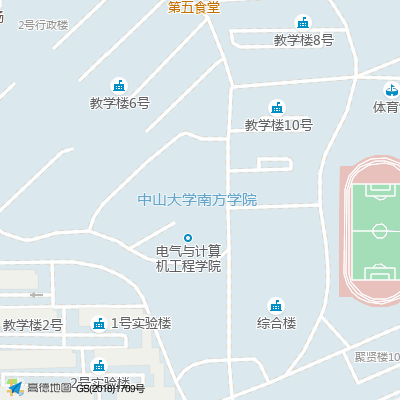

In [190]:
staticmap(location=中大南方_location,zoom=16)

# 总结及展望

## 对于复杂json

对于复杂json，细读API文档和测试尤其关键，可能有些功能是测试完才知道如何实现和体现其价值的

## 思考地图POI中的推荐算法工作原理

